### Free-Spoken Digit Dataset (FSDD)

In [1]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from tsc import compress_tsc, reconstruct_tsc
from tsc.utils.data import fsdd

<div class="alert alert-info">
    Note: the <code>tsc.utils</code> module does not install its dependencies by default; you must install <code>topological-signal-compression[extras]</code> to include these dependencies in your installation.
</div>

#### FSDD Example

The [Free-Spoken Digit Dataset (FSDD)](https://github.com/Jakobovski/free-spoken-digit-dataset) consists of the audio from 6 speakers saying the digits 0 through 9. As an example, below we include an example of one speaker saying "0."

In [2]:
# number of FSDD signals to pull
num_signals = 5

fsdd_signals, fsdd_labels = fsdd(dataset_size=num_signals)
sampling_rate = 8000  # FSDD sampling rate

# which signal to use downstream
signal_idx = 0

In [3]:
print(f"Audio of person saying integer {fsdd_labels[signal_idx]}")
ipd.Audio(fsdd_signals[signal_idx], rate=sampling_rate)

Audio of person saying integer 0


We can also plot this audio signal.

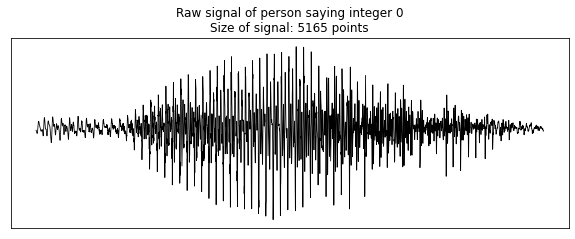

In [4]:
fig, ax = plt.subplots(figsize=(10, 3.5))
ax.plot(np.arange(fsdd_signals[signal_idx].size),
        fsdd_signals[signal_idx],
        c="black", lw=0.8)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(f"Raw signal of person saying integer {fsdd_labels[signal_idx]}\n"
             f"Size of signal: {fsdd_signals[signal_idx].size} points")
plt.show()

#### Compressing with TSC

[As discussed in the Introduction to TSC notebook](https://geomdata.gitlab.io/topological-signal-compression/intro_to_tsc.html#Minimum-Compression-with-TSC), our smallest simplification with TSC is to return *only* the critical points.

In [5]:
tsc_compressed_all = compress_tsc(
    signal=np.c_[np.arange(fsdd_signals[signal_idx].size),
                 fsdd_signals[signal_idx]],
    num_indices_to_keep="all")

percent_compressed_all = \
    (1 - tsc_compressed_all.shape[0]/fsdd_signals[signal_idx].size) * 100

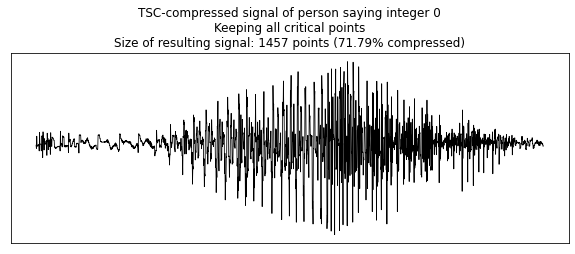

In [6]:
fig, ax = plt.subplots(figsize=(10, 3.5))
ax.plot(np.arange(tsc_compressed_all.shape[0]),
        tsc_compressed_all[:, 1],
        c="black", lw=0.8)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(
    f"TSC-compressed signal of person saying integer {fsdd_labels[signal_idx]}\n"
    "Keeping all critical points\n"
    f"Size of resulting signal: {tsc_compressed_all.shape[0]} points "
    f"({percent_compressed_all:.2f}% compressed)")
plt.show()

Since this is an audio dataset, as long as we reconstruct the signal up to the original frame rate, we can listen to our compressed audio signal.

In [7]:
tsc_reconstructed_all = reconstruct_tsc(signal=tsc_compressed_all)

print(f"Audio of person saying integer {fsdd_labels[signal_idx]} "
      f"after {percent_compressed_all:.2f}% compression with TSC")
ipd.Audio(tsc_reconstructed_all[:, 1], rate=sampling_rate)

Audio of person saying integer 0 after 71.79% compression with TSC


<div class="alert alert-info">
As we did in the Introduction notebook, we have implicitly assumed a linear connection in between points on the reconstructed signal. One could also reconstruct the signal with any desired monotonic function in between points.
</div>

#### Higher Compression Levels

We can compress even further. Below, we compress, visualize, and listen to 80%, 90%, and 95% compression.

<div class="alert alert-warning">
Although these compression percentages represent the number of points in our compressed signal, we also need to track the <i>time indices</i> of the points in our compression in order to reconstruct our signal. This is discussed further in the "Actual Compression on Transmission" section later in this notebook.
</div>

##### 80% Compression

In [8]:
tsc_compressed_some = compress_tsc(
    signal=np.c_[np.arange(fsdd_signals[signal_idx].size),
                 fsdd_signals[signal_idx]],
    num_indices_to_keep=0.2)

percent_compressed_some = \
    (1 - tsc_compressed_some.shape[0] \
     / fsdd_signals[signal_idx].size) * 100

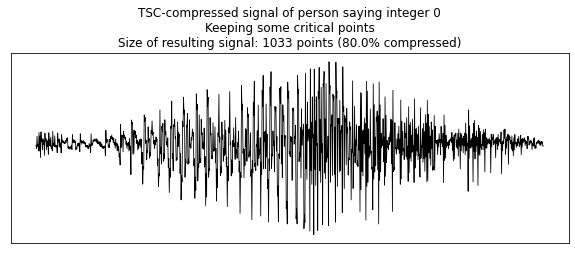

In [9]:
fig, ax = plt.subplots(figsize=(10, 3.5))
ax.plot(np.arange(tsc_compressed_some.shape[0]),
        tsc_compressed_some[:, 1],
        c="black", lw=0.8)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(
    f"TSC-compressed signal of person saying integer {fsdd_labels[signal_idx]}\n"
    "Keeping some critical points\n"
    f"Size of resulting signal: {tsc_compressed_some.shape[0]} points "
    f"({percent_compressed_some:.1f}% compressed)")
plt.show()

In [10]:
tsc_reconstructed_some = reconstruct_tsc(signal=tsc_compressed_some)

print(f"Audio of person saying integer {fsdd_labels[signal_idx]} "
      f"after {percent_compressed_some:.1f}% compression with TSC")
ipd.Audio(tsc_reconstructed_some[:, 1], rate=sampling_rate)

Audio of person saying integer 0 after 80.0% compression with TSC


##### 90% Compression

In [11]:
tsc_compressed_even_more = compress_tsc(
    signal=np.c_[np.arange(fsdd_signals[signal_idx].size),
                 fsdd_signals[signal_idx]],
    num_indices_to_keep=0.1)

percent_compressed_even_more = \
    (1 - tsc_compressed_even_more.shape[0] \
     / fsdd_signals[signal_idx].size) * 100

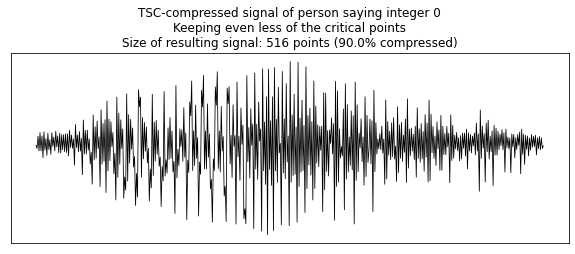

In [12]:
fig, ax = plt.subplots(figsize=(10, 3.5))
ax.plot(np.arange(tsc_compressed_even_more.shape[0]),
        tsc_compressed_even_more[:, 1],
        c="black", lw=0.8)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(
    f"TSC-compressed signal of person saying integer {fsdd_labels[signal_idx]}\n"
    "Keeping even less of the critical points\n"
    f"Size of resulting signal: {tsc_compressed_even_more.shape[0]} points "
    f"({percent_compressed_even_more:.1f}% compressed)")
plt.show()

In [13]:
tsc_reconstructed_even_more = \
    reconstruct_tsc(signal=tsc_compressed_even_more)

print(f"Audio of person saying integer {fsdd_labels[signal_idx]} "
      f"after {percent_compressed_even_more:.1f}% compression with TSC")
ipd.Audio(tsc_reconstructed_even_more[:, 1], rate=sampling_rate)

Audio of person saying integer 0 after 90.0% compression with TSC


##### 95% Compression

In [14]:
tsc_compressed_even_even_more = compress_tsc(
    signal=np.c_[np.arange(fsdd_signals[signal_idx].size),
                 fsdd_signals[signal_idx]],
    num_indices_to_keep=0.05)

percent_compressed_even_even_more = \
    (1 - tsc_compressed_even_even_more.shape[0] \
     / fsdd_signals[signal_idx].size) * 100

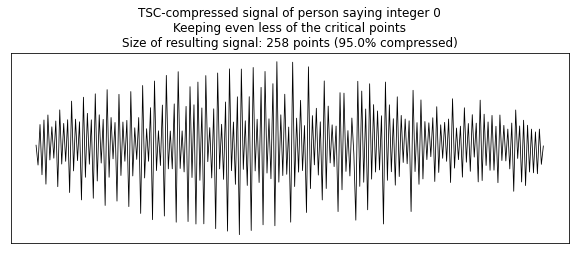

In [15]:
fig, ax = plt.subplots(figsize=(10, 3.5))
ax.plot(np.arange(tsc_compressed_even_even_more.shape[0]),
        tsc_compressed_even_even_more[:, 1],
        c="black", lw=0.8)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(
    f"TSC-compressed signal of person saying integer {fsdd_labels[signal_idx]}\n"
    "Keeping even less of the critical points\n"
    f"Size of resulting signal: "
    f"{tsc_compressed_even_even_more.shape[0]} points "
    f"({percent_compressed_even_even_more:.1f}% compressed)")
plt.show()

In [16]:
tsc_reconstructed_even_even_more = \
    reconstruct_tsc(signal=tsc_compressed_even_even_more)

print(f"Audio of person saying integer {fsdd_labels[signal_idx]} "
      f"after {percent_compressed_even_even_more:.1f}% compression with TSC")
ipd.Audio(tsc_reconstructed_even_even_more[:, 1], rate=sampling_rate)

Audio of person saying integer 0 after 95.0% compression with TSC


#### Actual Compression on Transmission

Our compression percentages referenced above deserve some qualification.

Intuitively, we are indeed compressing by the amounts stated above. That is, a 95% compression only uses 5% of the original signal values.

That being said, this is not the true compression with respect to *transmission constraints*. In order to reconstruct our signal, we cannot only send the signal values because we no longer have a set of evenly-spaced function values in time. **In order to reconstruct our TSC-compressed signal, we must also send the time values corresponding to each signal value**.

Thus, if we measure our compression based on *number of transmitted values*, our 95% compression would actually give us the following compression:

In [17]:
percent_compressed_even_even_more_number_of_points = \
    (1 - tsc_compressed_even_even_more.size \
     / fsdd_signals[signal_idx].size) * 100

print("Actual compression in number of points transmitted: "
      f"{percent_compressed_even_even_more_number_of_points:.2f}%")

Actual compression in number of points transmitted: 90.01%


There are additional factors, however, that could alter our compression percentage.

Aside from our ability to use compression tools like [gzip](https://www.gnu.org/software/gzip/), we could potentially use different bit resolution for our time indices.

For example, suppose our signal values were 64-bit floating point values, but our time indices were simply integers. The time indices could potentially be stored as 32-bit, 16-bit, or even as low as 8-bit integers if our signal were sufficiently small. Thus, despite doubling the number of *values* we need to transmit, we might not be doubling the number of *bits* needed to transmit.

#### Counterfactual Compressions

Rather than consider counterfactual compressions here listening to FSDD values, we instead will do this on a snippet of classical music in the [Music notebook](https://geomdata.gitlab.io/topological-signal-compression/music.html).

#### References

[1] J. Flaks, Z. Jackson, H. Nicolas, Y. Pan, C. Souza, and A. Thite, Free Spoken Digit Dataset, 2017. https://zenodo.org/badge/latestdoi/61622039.